#### 𝗟𝗲𝘃𝗲𝗹 - 𝟯 𝗧𝗮𝘀𝗸 - 𝟭

Tᴀsᴋ: 𝗥𝗲𝘀𝘁𝗮𝘂𝗿𝗮𝗻𝘁 𝗥𝗲𝘃𝗶𝗲𝘄𝘀

• Analyze the text reviews to identify the most common positive and negative keywords.

• Calculate the average length of reviews and explore if there is a relationship between review length and rating.

### Loading dataset:

In [1]:
# Import all necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset:

df = pd.read_csv(r"E:\Cognifyz_Internship\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Check the column names its datatype and their Null values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

##  Analyze the text reviews to identify the most common positive and negative keywords.

In [4]:
# Rating count of different Rating text:

reviews_data = df['Rating text'].value_counts()
reviews_data

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

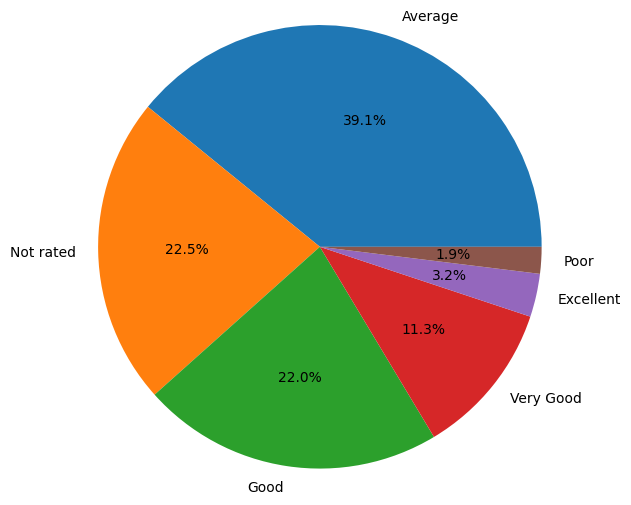

In [5]:
plt.pie(reviews_data.values, labels=reviews_data.index, autopct="%.1f%%", radius=1.5)
plt.show()

By seeing the above review_data

• The most common positive keyword counts : 𝟑𝟎𝟏 (i.e, for 𝐄𝐱𝐜𝐞𝐥𝐥𝐞𝐧𝐭)

• The most common negative keyword counts : 𝟏𝟖𝟔 (i.e, for 𝐏𝐨𝐨𝐫)

## Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [6]:
# Calculate average length of reviews:

reviews = df['Rating text']
total_reviews = len(reviews)
total_review_length = 0

for review in reviews:
    total_review_length += len(review.split())
    
avg_review_length = total_review_length / total_reviews

print('Average review length:', round(avg_review_length,2))

Average review length: 1.34


In [7]:
# Relationship between rating and review length:

review_len_vs_rating = {}

for rating in df['Aggregate rating'].unique():
    filtered_reviews = df.loc[df['Aggregate rating'] == rating]['Rating text']
    total_length = 0
    total_reviews = len(filtered_reviews)
    
    for review in filtered_reviews:
        total_length+= len(review.split())
        
    average_length = total_length / total_reviews
    review_len_vs_rating[rating] = average_length
    
print('Rating v/s Average review length')
print(review_len_vs_rating)

Rating v/s Average review length
{4.8: 1.0, 4.5: 1.0, 4.4: 2.0, 4.9: 1.0, 4.0: 2.0, 4.2: 2.0, 4.3: 2.0, 3.6: 1.0, 4.7: 1.0, 3.0: 1.0, 3.8: 1.0, 3.7: 1.0, 3.2: 1.0, 3.1: 1.0, 0.0: 2.0, 4.1: 2.0, 3.3: 1.0, 4.6: 1.0, 3.9: 1.0, 3.4: 1.0, 3.5: 1.0, 2.2: 1.0, 2.9: 1.0, 2.4: 1.0, 2.6: 1.0, 2.8: 1.0, 2.1: 1.0, 2.7: 1.0, 2.5: 1.0, 1.8: 1.0, 2.0: 1.0, 2.3: 1.0, 1.9: 1.0}


In [8]:
review_len_vs_rating = pd.DataFrame({'rating': list(review_len_vs_rating.keys()), 'avg_review_len' : list(review_len_vs_rating.values())})
review_len_vs_rating 

,rating,avg_review_len
0,4.8,1.0
1,4.5,1.0
2,4.4,2.0
3,4.9,1.0
4,4.0,2.0
5,4.2,2.0
6,4.3,2.0
7,3.6,1.0
8,4.7,1.0
9,3.0,1.0


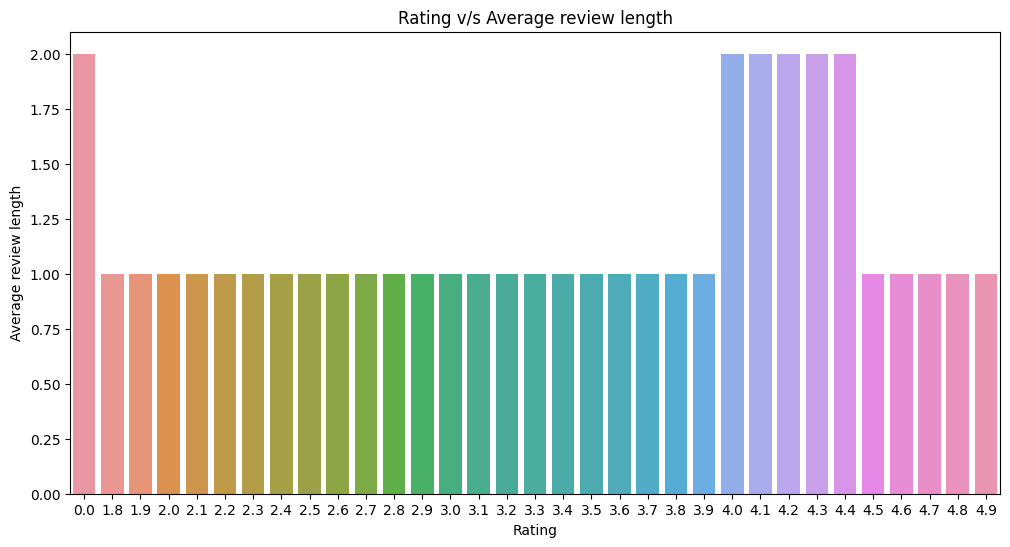

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='avg_review_len', data=review_len_vs_rating)
plt.title('Rating v/s Average review length')
plt.xlabel('Rating')
plt.ylabel('Average review length')
plt.show()